In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patch
import seaborn as sns
import plotly.express as px

In [83]:
sns.set(rc={'figure.figsize':(20,9)})
sns.set(font_scale=1.5)

In [84]:
df = pd.read_csv('./data/python1.csv')
terms_df = pd.read_csv('./data/terms.csv')

In [85]:
df.head()

,python,selftext,title,self_pol,self_sub,title_pol,title_sub,title_words,self_words,words,sentences,text_pol,text_sub,text
0,1,i want to open multiple ssh session one to my...,paramiko multiple ssh session,0.000000,0.250000,0.000000,0.000000,4.0,29.0,33.0,3.0,0.000000,0.166667,i want to open multiple ssh session one to my...
1,1,NaN,off decision trees random forests ada...,0.000000,0.000000,-0.500000,0.500000,9.0,0.0,9.0,0.0,-0.500000,0.500000,off decision trees random forests ada...
2,1,i have to write a script for children in cl...,need some help from the smart people,0.091667,0.338889,0.214286,0.642857,7.0,86.0,93.0,9.0,0.038095,0.303175,i have to write a script for children in cl...
3,1,NaN,i made tinder bot written in python selenium,0.000000,0.000000,0.000000,0.000000,8.0,0.0,8.0,0.0,0.000000,0.000000,i made tinder bot written in python selenium
4,1,streamlit vercel i can t figure out how ...,is it possible to host a streamlit app on vercel,0.000000,0.000000,0.000000,1.000000,10.0,27.0,37.0,1.0,0.000000,1.000000,streamlit vercel i can t figure out how ...


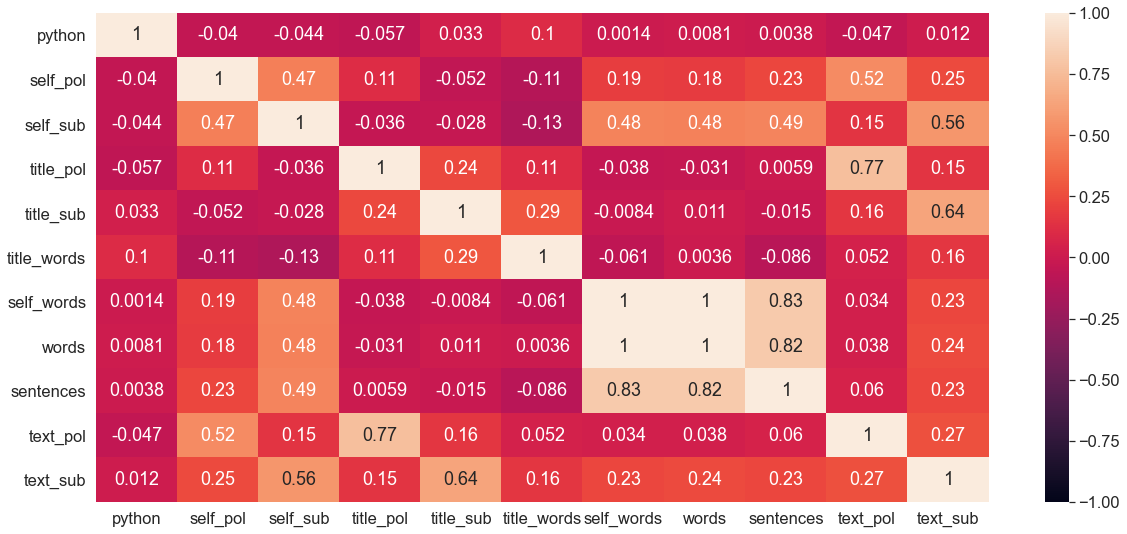

In [86]:
plt.figure(figsize=(20,9))
sns.heatmap(df.corr(),
#             square=True,
            annot=True,
            vmin=-1,
            vmax=1
           );

>## Nothing really to see here, obvious correlations between some features but nothing which correlates to whether the subreddit is python or Golang.

[Text(0, 0, 'Golang'), Text(0, 0, 'Python')]

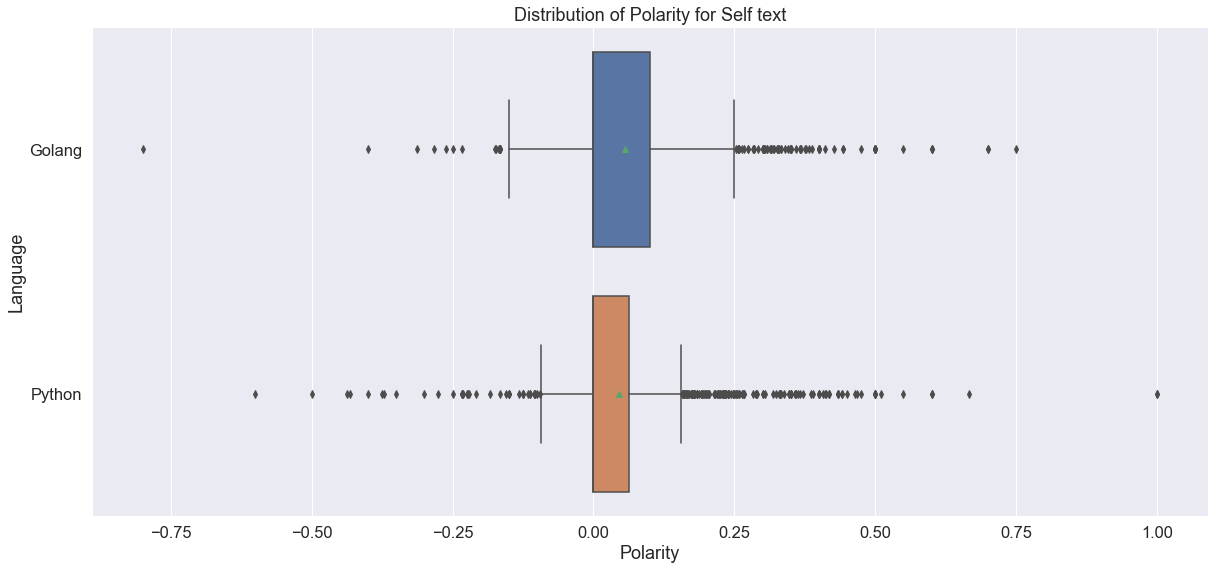

In [87]:
ax = sns.boxplot(y="python", 
                 x="self_pol",
                 orient='h', 
                 data=df,
                 showmeans=True
                );
plt.xlabel("Polarity")
plt.ylabel("Language")
plt.title("Distribution of Polarity for Self text");
ax.set_yticklabels(labels=('Golang', 'Python'))

# plt.savefig('./assets/boxdist_sub.png')
# plt.savefig('./assets/boxdist_sub_trans.png', transparent=True)

>## Golang and Python have relatively similiar polarity for the post body, so the posts were pretty evenly neutral.

[Text(0, 0, 'Golang'), Text(0, 0, 'Python')]

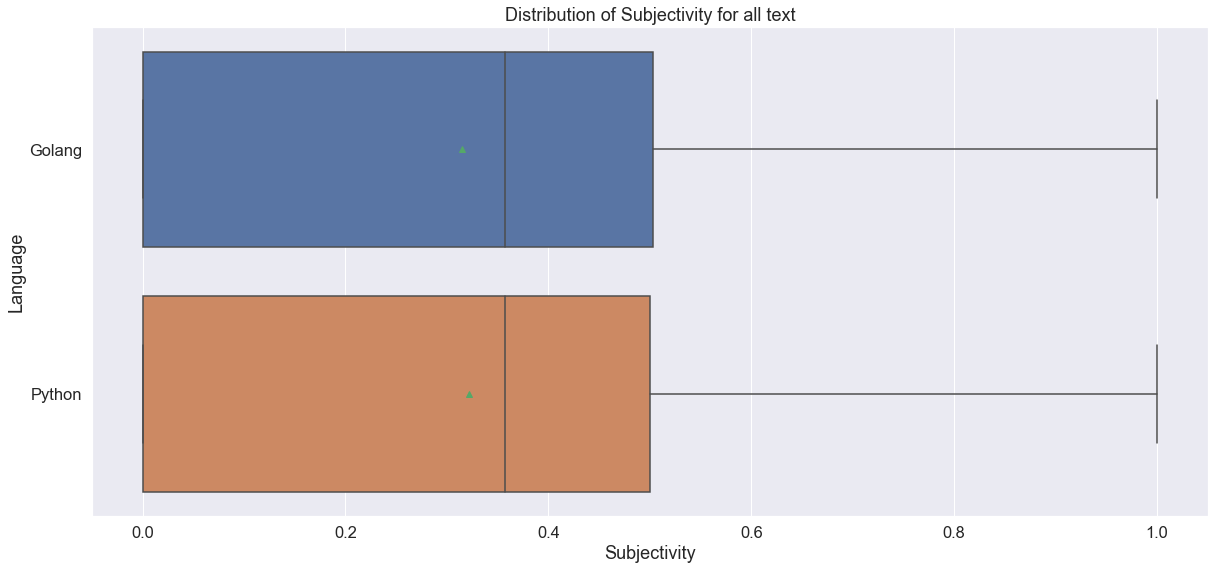

In [88]:

ax = sns.boxplot(y="python", 
                 x="text_sub",
                 orient='h', 
                 data=df,
                 showmeans=True
                );
plt.xlabel("Subjectivity")
plt.ylabel("Language")
plt.title("Distribution of Subjectivity for all text");
ax.set_yticklabels(labels=('Golang', 'Python'))

# plt.savefig('./assets/boxdist_sub.png')
# plt.savefig('./assets/boxdist_sub_trans.png', transparent=True)

>## Golang and Python have relatively similiar subjectivity, so the posts were fared more towards neutral here too.

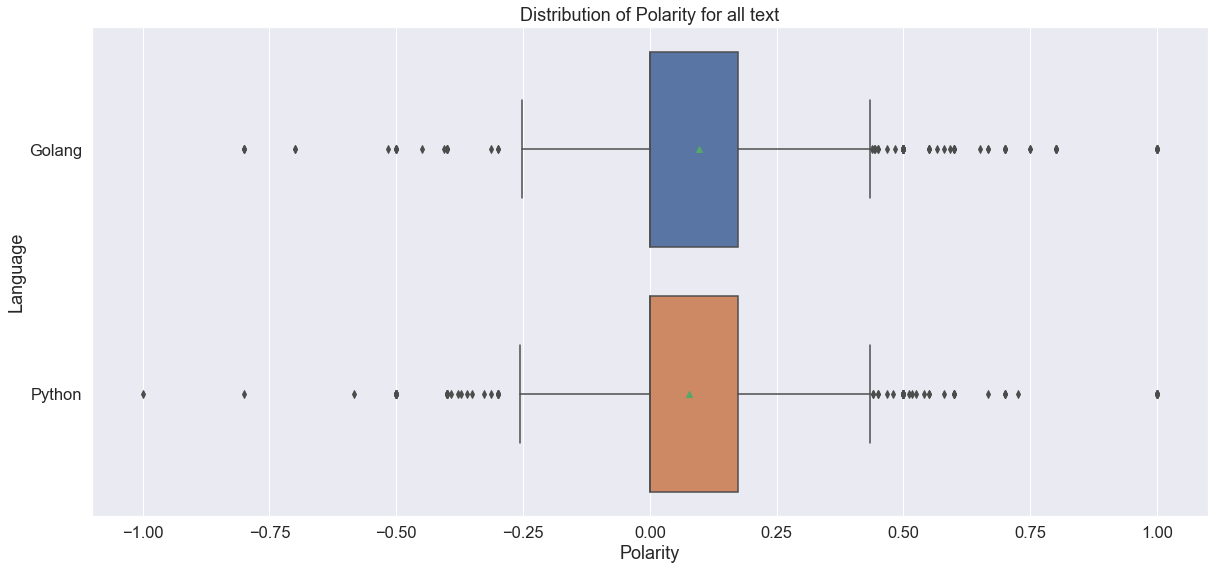

In [103]:

ax = sns.boxplot(y="python", 
                 x="text_pol",
                 orient='h', 
                 data=df,
                 showmeans=True
                );
plt.xlabel("Polarity")
plt.ylabel("Language")
plt.title("Distribution of Polarity for all text");
ax.set_yticklabels(labels=('Golang', 'Python'));

# plt.savefig('./assets/boxdist.png')
# plt.savefig('./assets/boxdist_trans.png', transparent=True)

>## Golang and Python have relatively similiar polarity for all text as well, so the posts were fared more towards neutral here too.

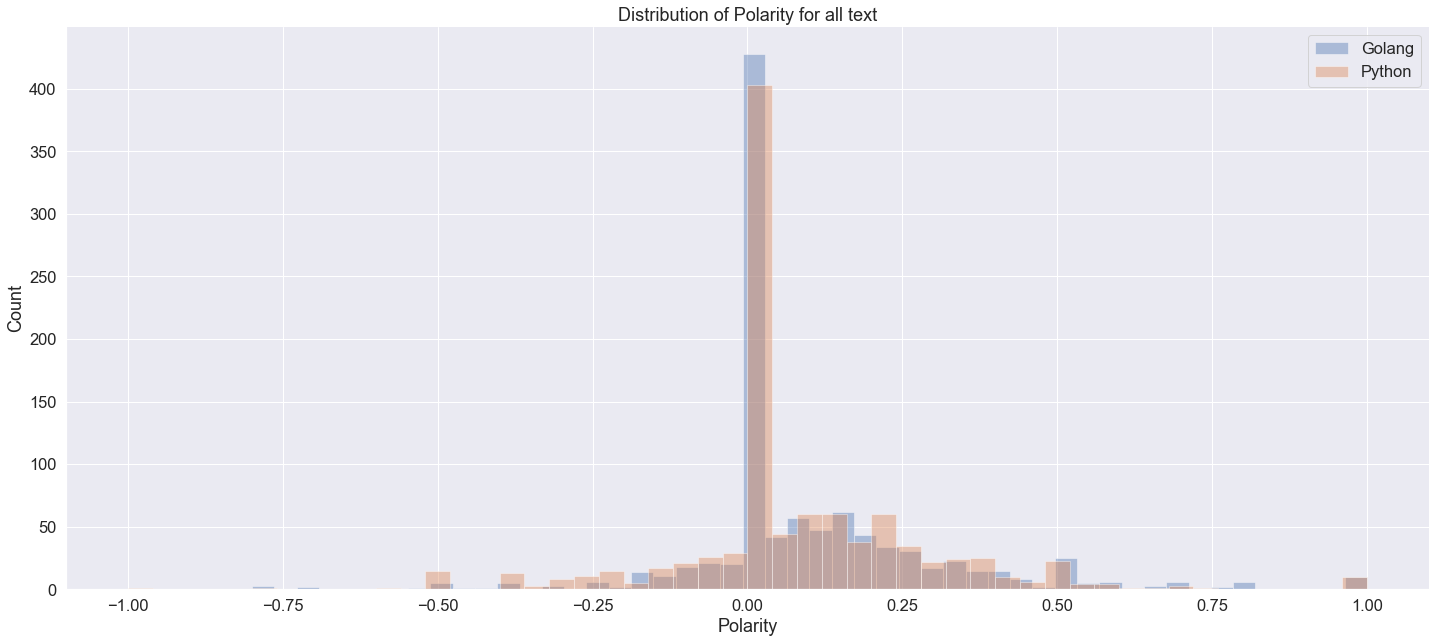

In [104]:
g = sns.FacetGrid(df, hue="python",height=9, aspect=2.22)
g = g.map(sns.distplot, "text_pol", kde=False, bins=50);
plt.xlabel("Polarity")
plt.ylabel("Count")
plt.title("Distribution of Polarity for all text");
plt.legend(labels=(('Golang', 'Python')));

# plt.savefig('./assets/distplot.png')
# plt.savefig('./assets/distplot_trans.png', transparent=True)

>## Same as the boxplot above, just a different view. Golang and Python have relatively similiar subjectivity, so the posts were fared more towards neutral here too.

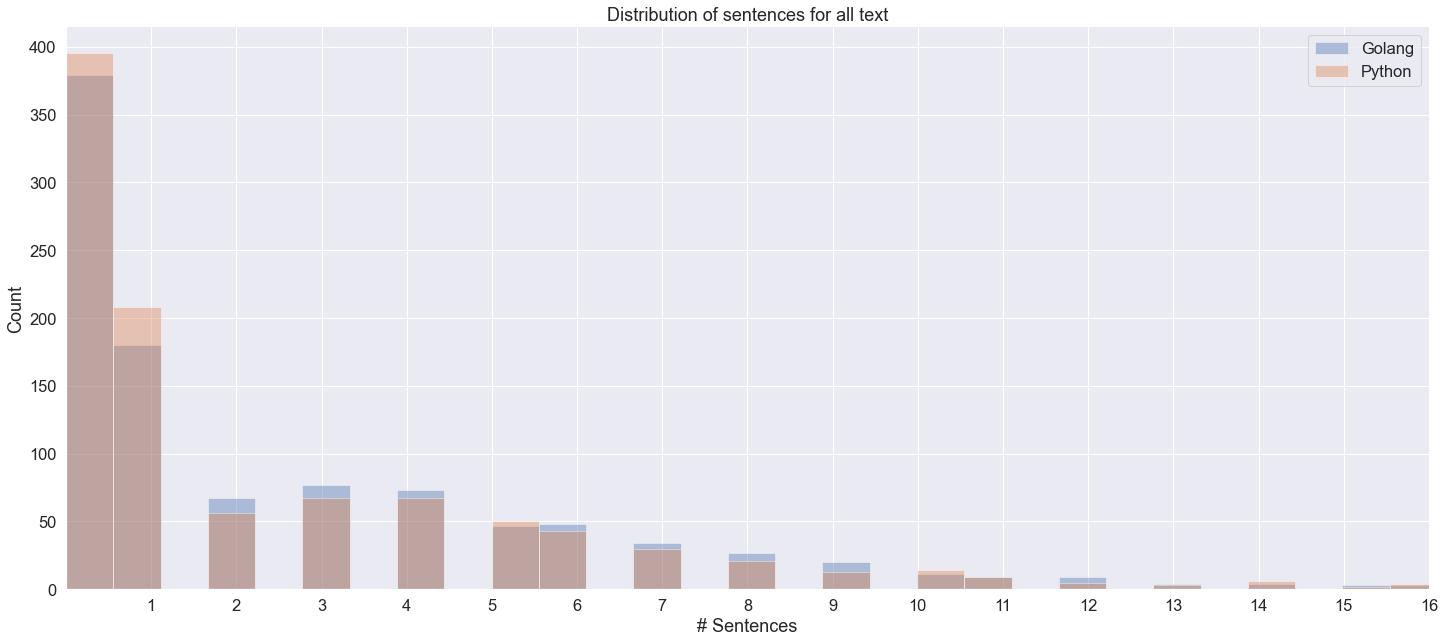

In [123]:
_, bins = np.histogram(df["sentences"],bins=200)
g = sns.FacetGrid(df, hue="python",height=9, aspect=2.22)
g = g.map(sns.distplot, "sentences", kde=False, bins=bins);
plt.xlabel("# Sentences")
plt.ylabel("Count")
plt.title("Distribution of sentences for all text");
plt.legend(labels=(('Golang', 'Python')))
plt.xticks(range(1,21))
plt.xlim(0,16);
# plt.savefig('./assets/distplot_sent.png')
# plt.savefig('./assets/distplot_sent_trans.png', transparent=True)

>## This distribution of sentences is pretty even here too.

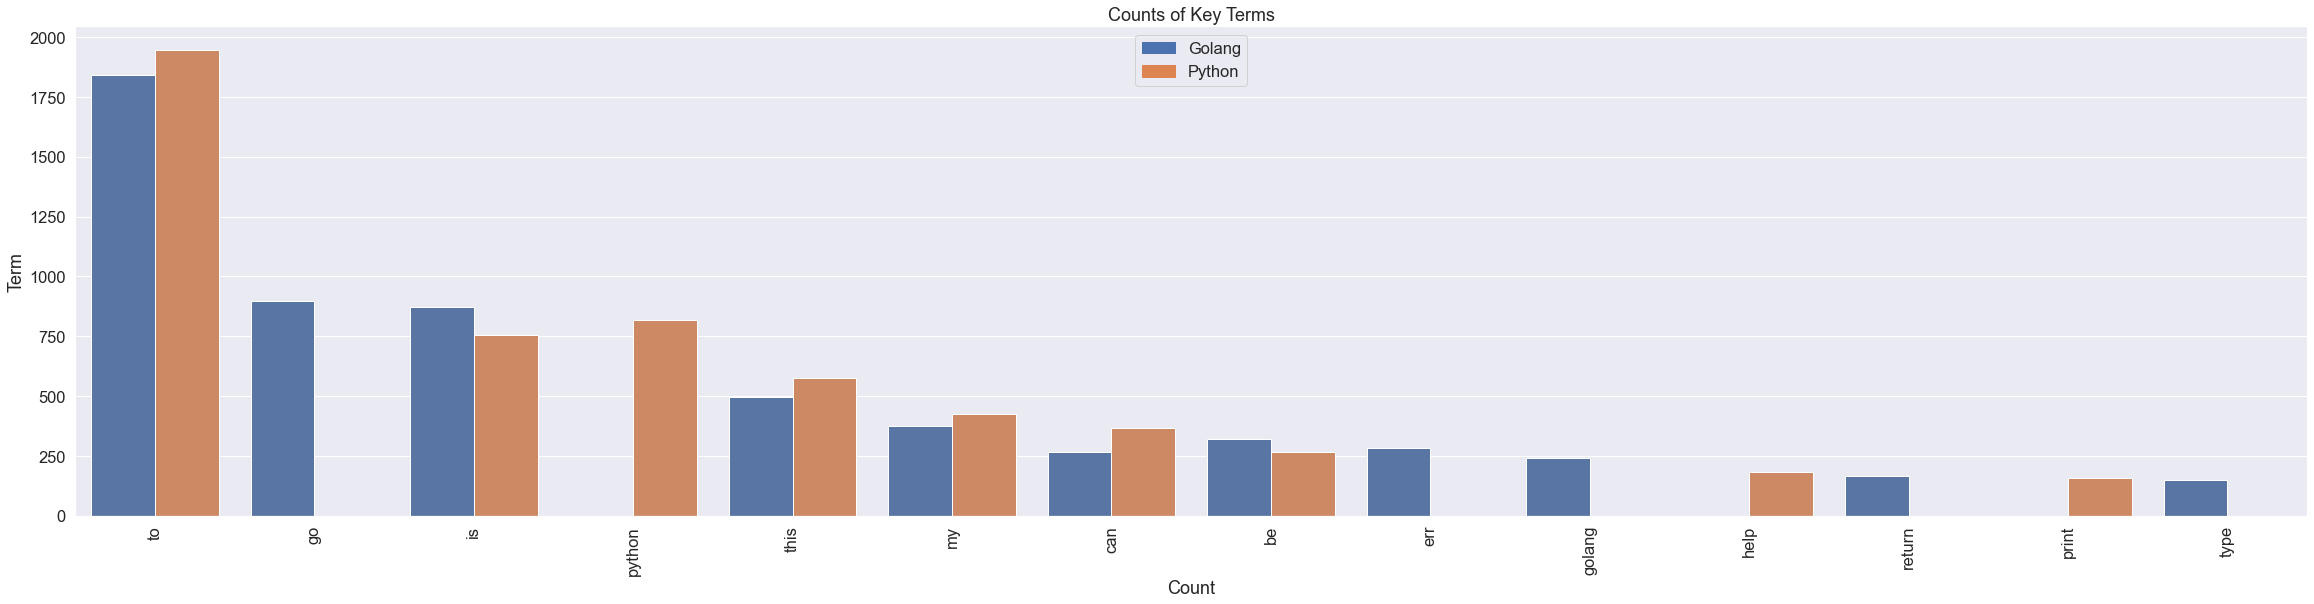

In [132]:
plt.figure(figsize=(40,9))
sns.barplot(x="Term", y='Count', hue='python', data=terms_df.sort_values(by=['Count'],ascending=False)[:20], orient='v');
plt.xlabel("Count")
plt.ylabel("Term")
plt.title("Counts of Key Terms");
plt.xticks(rotation=90)


name_to_color = {
    'Golang': '#4c72b0',
    'Python': '#dd8452',
}

patches = [patch.Patch(color=v, label=k) for k,v in name_to_color.items()]
plt.legend(handles=patches);

plt.savefig('./assets/term_count.png')
plt.savefig('./assets/term_count_trans.png', transparent=True)